<h1>§7. Transfer Learning Using MobileNet V2</h1>

Finally, we sought to use a more sophisticated, pre-trained model to address the observed racial bias. We used MobileNet V2.

In [80]:
IMG_SHAPE = (160, 160, 3)
# load MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
# freeze the base model
base_model.trainable = False
# build a layer using the imported MobileNetV2 model
i = tf.keras.Input(shape=IMG_SHAPE)
x = base_model(i, training = False)
base_model_layer = tf.keras.Model(inputs = [i], outputs = [x])

9420800/9406464 [==============================] - 1s 0us/step


We will now construct a new model that contains the preprocessor and data augmentation layers we created before, the MobileNetV2 layer, a GlobalMaxPooling2D layer, and a Dense layer.

In [81]:
# build a new model using transfer learning
model_transfer = models.Sequential([
    # preprocessing layer
    preprocessor,
    # data augmentation
    layers.RandomFlip('horizontal'), 
    layers.RandomRotation(0.05),
    # MobileNetV2 layer
    base_model_layer,
    # GlobalMaxPooling layer to reduce dimensionality
    layers.GlobalMaxPooling2D(),
    # Dense layer
    layers.Dense(2),
])

In [82]:
# compile the model
model_transfer.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# from_logits=True compute softmax when evaluting loss function
# metrics=['accuracy'] want to see how accurate on the data

# fit the model on 80% of the training set, evaluate on the rest
history_transfer = model_transfer.fit(train_data,
                     train_target, 
                     epochs=20,
                     validation_split=0.2)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
57/57 [==============================] - ETA: 0s - loss: 0.7616 - accuracy: 0.7999WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x14d8dda70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

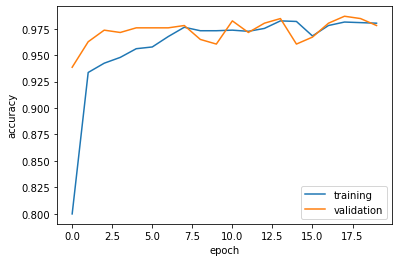

In [83]:
"""
Our results proved to be pretty precise and there
is no apparent sign of overfitting.
"""
plt.plot(history_transfer.history["accuracy"], label = "training")
plt.plot(history_transfer.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy") # gca: get current axis 
plt.legend()

Indeed, our new model seems to have outperformed the original model, both in terms of validation accuracy and overfitting.

<h1>§8. Testing Transfer Learning Model on Datasets of Different Racial Groups</h1>

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]
2/2 [==============================] - 1s 251ms/step - loss: 0.1115 - accuracy: 0.9661
[0.11148443073034286, 0.9661017060279846]
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


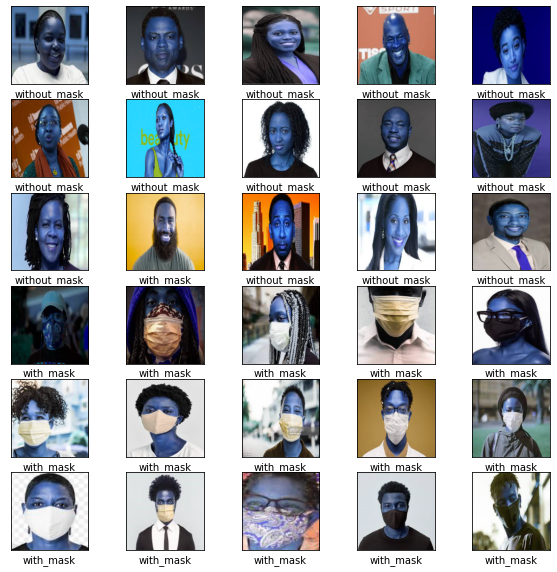

In [85]:
# testing on black people
testing("data/Testing_Black", model_transfer)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]
2/2 [==============================] - 1s 254ms/step - loss: 0.1979 - accuracy: 0.9500
[0.19792117178440094, 0.949999988079071]


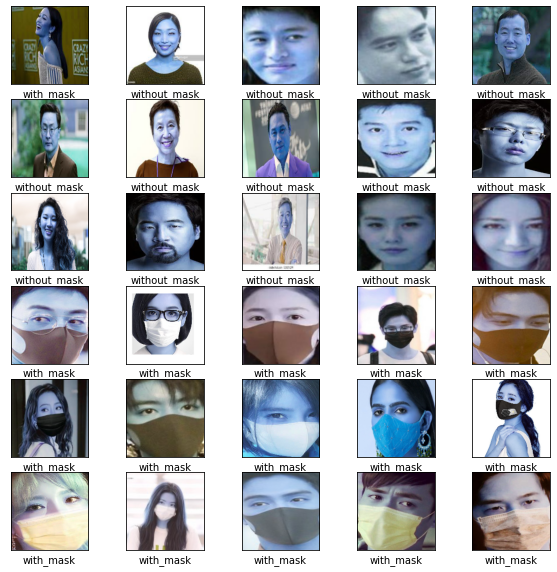

In [86]:
# testing on Asian people
testing("data/Testing_Asian", model_transfer)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]
2/2 [==============================] - 1s 209ms/step - loss: 0.1001 - accuracy: 0.9636
[0.10009092092514038, 0.9636363387107849]


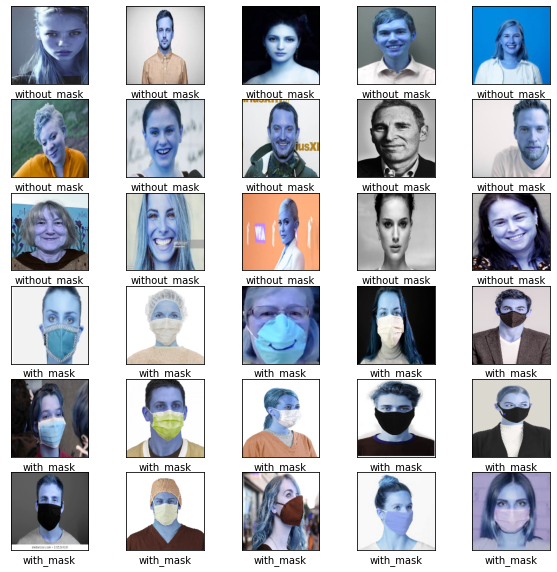

In [87]:
# testing on white people
testing("data/Testing_White", model_transfer)

Overall, the transfer learning model performed equally well on all racial groups, with an accuracy level of around 95~96%.